In [25]:
#Import relevant packages
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
#Import dataset
file_path = 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)
print(data.head())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0   

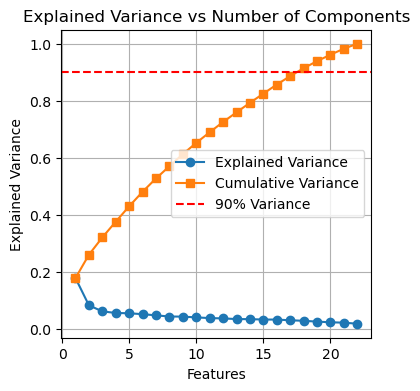

In [64]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

#Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#Run full PCA
pca = PCA()
pca.fit(data_scaled)

#Calculate explained variance ratio using pca function
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

#Plot explained variance against components used
plt.figure(figsize=(4,4))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='s', label='Cumulative Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')  
plt.title('Explained Variance vs Number of Components')
plt.xlabel('Features')
plt.ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

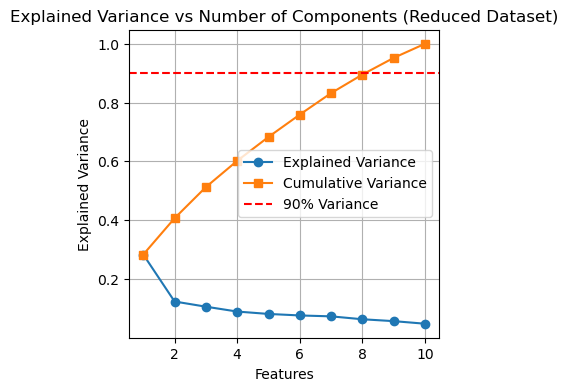

In [65]:
#Let's rerun our explained variance visualization with our selected features from logistic regression/XGBoost
#Define the selected features
selected_features = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 
                     'PhysActivity', 'DiffWalk', 'BMI', 'GenHlth', 'Age', 'Income']

#Extract the reduced dataset
data_selected = data[selected_features]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

pca = PCA()
pca.fit(data_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

#Plot cumulative variance against components used
plt.figure(figsize=(4,4))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='s', label='Cumulative Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')  
plt.title('Explained Variance vs Number of Components (Reduced Dataset)')
plt.xlabel('Features')
plt.ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

In [10]:
#Copy dataframe
data_modified = data.copy()
data_modified['Diabetes_binary'] = data_modified['Diabetes_binary'].replace(2.0, 1.0)
print(data_modified.head())

data_modified.to_csv('diabetes_binary_modified.csv', index=False)

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0   

In [8]:
#Separate features (X) and target (y)
X = data.drop(columns=['Diabetes_binary']) 
y = data['Diabetes_binary'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000, stratify=y)
rf_classifier = RandomForestClassifier(random_state=1000, n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7336

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72      7070
         1.0       0.72      0.77      0.74      7069

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139


Confusion Matrix:
[[4943 2127]
 [1640 5429]]


In [9]:
#Logistic Regression classifier
log_reg_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg_classifier.fit(X_train, y_train)
y_pred_log_reg = log_reg_classifier.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.7456

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      7070
         1.0       0.74      0.76      0.75      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139


Confusion Matrix (Logistic Regression):
[[5143 1927]
 [1670 5399]]


In [67]:
X = data_modified.drop(columns=['Diabetes_binary']) 
y = data_modified['Diabetes_binary'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
#Random forest classifier
rf_classifier = RandomForestClassifier(random_state=1000, n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7336

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72      7070
         1.0       0.72      0.77      0.74      7069

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



In [14]:
#Logistic regression
log_reg_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=1000)
log_reg_classifier.fit(X_train, y_train)
y_pred_log_reg = log_reg_classifier.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7456

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      7070
         1.0       0.74      0.76      0.75      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [18]:
#XGBoost classifier
xgb_classifier = XGBClassifier(random_state=1000, n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier Accuracy: 0.7507

Classification Report (XGBoost):
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7070
         1.0       0.73      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



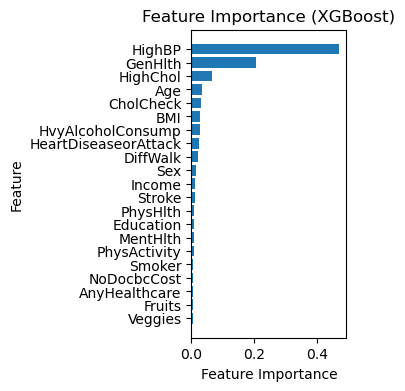

                 Feature  Importance
0                 HighBP    0.469794
13               GenHlth    0.204427
1               HighChol    0.065982
18                   Age    0.033981
2              CholCheck    0.030222
3                    BMI    0.026971
10     HvyAlcoholConsump    0.025996
6   HeartDiseaseorAttack    0.025558
16              DiffWalk    0.021978
17                   Sex    0.014684


In [70]:
#Feature importances
xgb_classifier = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_classifier.fit(X_train, y_train)
feature_importances = xgb_classifier.feature_importances_

#Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(2, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (XGBoost)')
plt.gca().invert_yaxis()
plt.show()

#Top 10 features
print(importance_df.head(10))

In [26]:
#Cross-validation of XGBoost classifier
xgb_classifier = XGBClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='multi:softmax',
    num_class=len(y.unique())  
)

#Perform cross-validation
cv_scores = cross_val_score(xgb_classifier, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.74298041 0.74892142 0.75272316 0.75802801 0.75753289]
Mean Cross-Validation Accuracy: 0.7520


In [56]:
#Select the top N features (e.g., top 15)
top_features = importance_df.head(15)['Feature']
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

#Retrain the model using the top features
xgb_classifier_top = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_classifier_top.fit(X_train_top, y_train)

#Evaluate the model with the selected features
y_pred_top = xgb_classifier_top.predict(X_test_top)
accuracy_top = accuracy_score(y_test, y_pred_top)

print(f"Accuracy with Top Features: {accuracy_top:.4f}")

Accuracy with Top Features: 0.7524
